In [15]:
import numpy as np
from pylab import *
       
%matplotlib notebook

from craco import calibration
%load_ext autoreload
%autoreload 2
from scipy.interpolate import interp1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
polsum = np.load('/data/seren-10/big/craco/results/SB000000/scans/-2/20230316233556/nodes/seren-01/results/rescale/b02/c01/rescale_016.npz')
dualpol =  np.load('/data/seren-10/big/craco/results/SB000000/scans/-2/20230316233724/nodes/seren-01/results/rescale/b02/c01/rescale_016.npz')

In [22]:
list(polsum.keys())

['mean', 'count', 'scount', 'variance', 'stdev', 'offset', 'scale']

In [17]:
polsum['mean'].shape

(1, 24, 465, 1)

In [18]:
dualpol['mean'].shape

(1, 24, 465, 2)

In [19]:
chan = 12

<IPython.core.display.Javascript object>


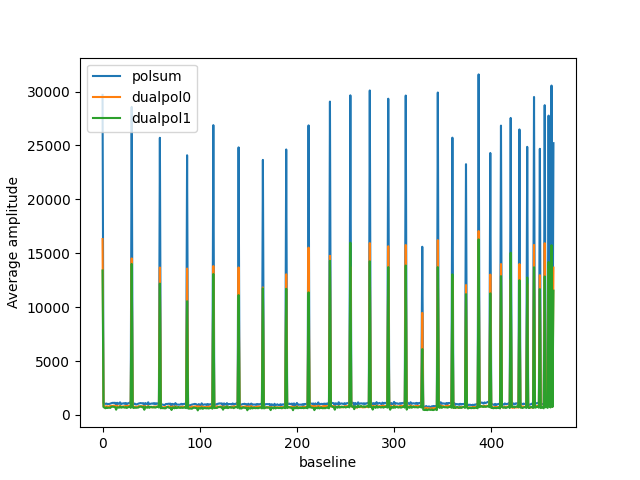

Text(0, 0.5, 'Average amplitude')

In [25]:
figure()
plot(polsum['mean'][0,chan,:,0], label='polsum')
plot(dualpol['mean'][0,chan,:,0], label='dualpol0')
plot(dualpol['mean'][0,chan,:,1], label='dualpol1')
legend()
xlabel('baseline')
ylabel('Average amplitude')

<IPython.core.display.Javascript object>


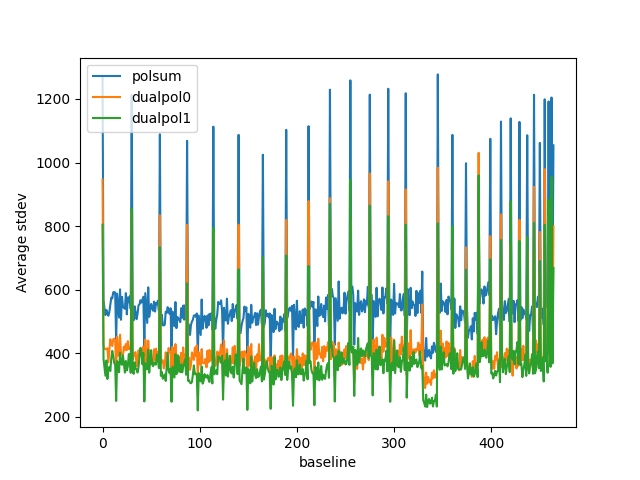

Text(0, 0.5, 'Average stdev')

In [24]:
figure()
t = 'stdev'
plot(polsum[t][0,chan,:,0], label='polsum')
plot(dualpol[t][0,chan,:,0], label='dualpol0')
plot(dualpol[t][0,chan,:,1], label='dualpol1')
legend()
xlabel('baseline')
ylabel('Average stdev')

In [26]:
nant = 30
auto_idxs = []
idx = 0
for ia1 in range(nant):
    for ia2 in range(ia1, nant):
        if ia1 == ia2:
            auto_idxs.append(idx)
            
        idx += 1
        
auto_idxs = np.array(auto_idxs)

<IPython.core.display.Javascript object>


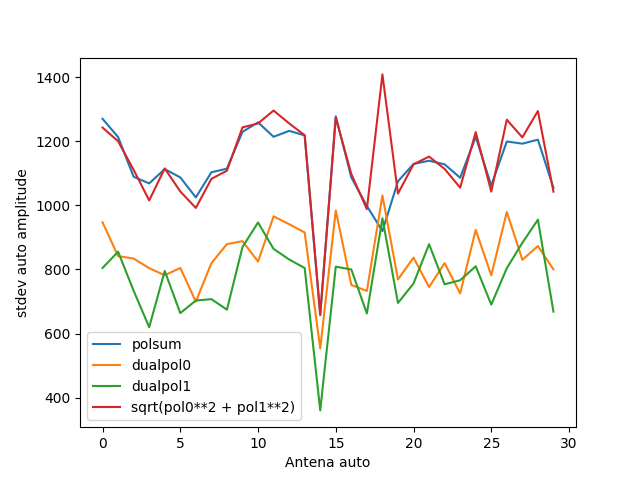

In [38]:
t = 'stdev'
figure()
plot(polsum[t][0,chan,auto_idxs,0], label='polsum')
plot(dualpol[t][0,chan,auto_idxs,0], label='dualpol0')
plot(dualpol[t][0,chan,auto_idxs,1], label='dualpol1')
ssum = np.sqrt((dualpol[t][0,chan,auto_idxs,0]**2 + dualpol[t][0,chan,auto_idxs,1]**2))
plot(ssum, label='sqrt(pol0**2 + pol1**2)')

xlabel('Antena auto')
ylabel(t + ' auto amplitude')
legend()

<IPython.core.display.Javascript object>


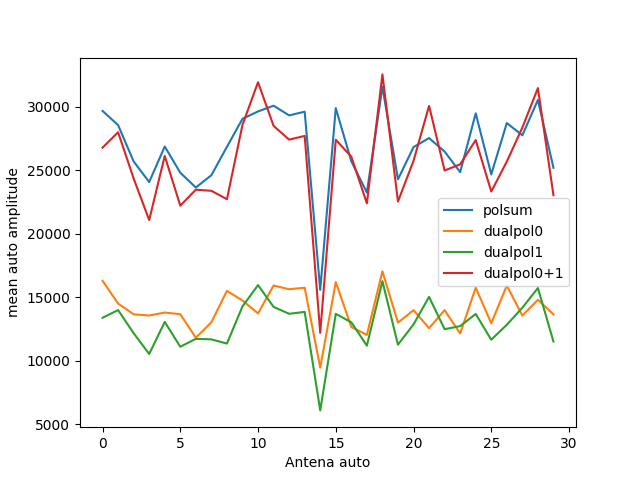

Text(0, 0.5, 'mean auto amplitude')

In [39]:
t = 'mean'
figure()
plot(polsum[t][0,chan,auto_idxs,0], label='polsum')
plot(dualpol[t][0,chan,auto_idxs,0], label='dualpol0')
plot(dualpol[t][0,chan,auto_idxs,1], label='dualpol1')
plot(dualpol[t][0,chan,auto_idxs,1] + dualpol[t][0,chan,auto_idxs,1], label='dualpol0+1')
xlabel('Antena auto')
legend()
ylabel(t + ' auto amplitude')